# Problem set 4: Analyzing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd

# 'old' version
#from PyDST import pydst as dst
#dst = DST(lang='en')

# 'new' PyDST
import PyDST
dst = PyDST.pydst

# DstApi
from dstapi import DstApi

C:\Users\sofie\AppData\Local\Temp\ipykernel_5648\4239240190.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [2]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [3]:
# 'old' pydst
# nah1 = dst.get_data(table_id = 'nah1', variables={'TRANSAKT':'*', 'PRISENHED':'*', 'TID':'*'})

# 'New' PyDST
response = dst.get_data(table_id = 'nah1', variables={'TRANSAKT': '*', 'PRISENHED': '*', 'TID': '*'}, lang='en') #'*' gets all entries
nah1 = PyDST.utils.to_dataframe(response)

# if you're using dstapi, you can get the same data like this:
# nah1_class = DstApi('NAH1')
# params = nah1_class._define_base_params(language='en') # try to print out params to see what it looks like
# nah1 = nah1_class.get_data(params)

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [4]:
# hint, nah1_true.rename(?,inplace=True)
nah1 = nah1.rename(columns=columns_dict, inplace=False)

In [5]:

# for key,value in var_dict.items():
#   nah1.variable.replace(?)
nah1.variable.replace(var_dict, inplace=True)

#for key,value in unit_dict.items():
#   nah1.unit.replace(?)
nah1.unit.replace(unit_dict, inplace=True)

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [6]:
# keep only rows with the variables of interest
I = nah1.variable.isin(var_dict.values()) # .isin operator is True if nah1.variable is in the values of var_dict
nah1 = nah1[I]

# convert to floats
nah1.value = nah1.value.astype('float')

# sort data!
nah1 = nah1.sort_values(['year', 'variable', 'unit'])

**Step 4:** Discuss what the following summary statistics show.

In [7]:
nah1.groupby(['variable','unit']).describe()

# The table shows statistics for each variable C, G, I, M, X, Y by price unit.
#  Also for the variable year, but that is meaningless.

year                                                     \
                 count    mean        std     min     25%     50%     75%   
variable unit                                                               
C        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
G        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
I        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
M        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
X        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
Y        nominal  57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   
         real     57.0  1994.0  16.598193  1966.0  1980.0  1994.0  2008.0   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2022.0  57.0  8.047424e+05  5.307765e+05    62576.0   
         real     2022.0  57.0  1.067348e+06  2.843046e+05   549491.0   
G        nominal  2022.0  57.0  2.731115e+05  1.882380e+05    14768.0   
         real     2022.0  57.0  3.738388e+05  1.041965e+05   171307.0   
I        nominal  2022.0  57.0  2.375771e+05  1.682620e+05    21134.0   
         real     2022.0  57.0  2.823898e+05  1.143072e+05   127630.0   
M        nominal  2022.0  57.0  4.680322e+05  4.040901e+05    24406.0   
         real     2022.0  57.0  5.031662e+05  3.357286e+05   112171.0   
X        nominal  2022.0  57.0  5.276742e+05  4.644961e+05    23110.0   
         real     2022.0  57.0  5.844853e+05  3.774875e+05   123594.0   
Y        nominal  2022.0  57.0  1.889688e+06  1.349894e+06   144582.0   
         real     2022.0  57.0  2.367640e+06  8.492730e+05  1089347.0   

                                                              
                        25%        50%        75%        max  
variable unit                                                 
C        nominal   322000.0   748365.0  1305931.0  1815557.0  
         real      847062.0  1040029.0  1343243.0  1556887.0  
G        nominal   105298.0   242403.0   452185.0   620143.0  
         real      310237.0   355506.0   473421.0   537877.0  
I        nominal    80672.0   186087.0   353247.0   687760.0  
         real      183220.0   236281.0   359370.0   566489.0  
M        nominal   132098.0   307210.0   789148.0  1634424.0  
         real      213097.0   363124.0   803852.0  1213702.0  
X        nominal   130293.0   366045.0   895202.0  1922751.0  
         real      245273.0   475081.0   914933.0  1385573.0  
Y        nominal   677930.0  1603057.0  3093079.0  5216933.0  
         real     1615002.0  2210638.0  3198587.0  4008007.0

**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [8]:
# 'new' PyDST
pop_response = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']}, lang='en')
pop = PyDST.utils.to_dataframe(pop_response)

# 'old' pydst
# pop = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']}, lang='en')

# DstApi
# ft_class = DstApi('FT')
# params = ft_class._define_base_params(language='en') #
# pop = ft_class.get_data(params)


pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
I = pop.HOVEDDELE == 'All Denmark'
pop =  pop.loc[I,['year','population']]
pop.head()

,year,population
0,1769,797584
1,1787,841806
2,1801,929001
3,1834,1230964
4,1840,1289075


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [9]:
# hint, merged = pd.merge(?,?,how='?',on=[?])
merged = pd.merge(nah1, pop, how='left', on='year') # 'left' means we only keep the rows that are in nah1
merged.tail(10)

,variable,unit,year,value,population
674,G,nominal,2022,620143.0,5873420.0
675,G,real,2022,522697.0,5873420.0
676,I,nominal,2022,687760.0,5873420.0
677,I,real,2022,566489.0,5873420.0
678,M,nominal,2022,1634424.0,5873420.0
679,M,real,2022,1213702.0,5873420.0
680,X,nominal,2022,1922751.0,5873420.0
681,X,real,2022,1385573.0,5873420.0
682,Y,nominal,2022,5216933.0,5873420.0
683,Y,real,2022,4008007.0,5873420.0


**Answer:** See A2.py

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [10]:
pop_with_index = pop.set_index('year')
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_with_index = merged.set_index('year')
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2022,G,nominal,620143.0,5873420.0,5873420.0
2022,G,real,522697.0,5873420.0,5873420.0
2022,I,nominal,687760.0,5873420.0,5873420.0
2022,I,real,566489.0,5873420.0,5873420.0
2022,M,nominal,1634424.0,5873420.0,5873420.0
2022,M,real,1213702.0,5873420.0,5873420.0
2022,X,nominal,1922751.0,5873420.0,5873420.0
2022,X,real,1385573.0,5873420.0,5873420.0
2022,Y,nominal,5216933.0,5873420.0,5873420.0


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

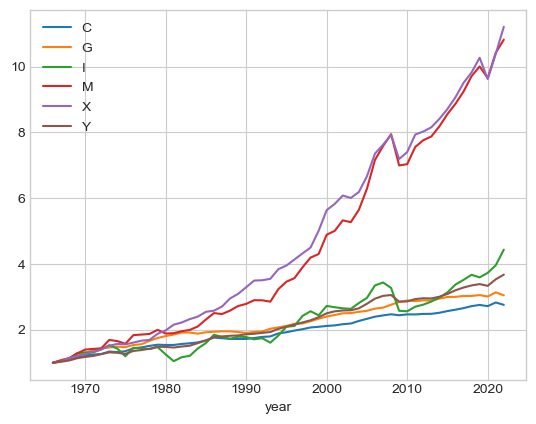

In [11]:
nah1_true = nah1.copy() # copy of original dataframe to run the pre-written code

# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    (df_indexed[I].groupby(['variable'])['indexed']
                  .plot(legend=True));
    
plot(nah1_true)


**Question** Implement the same split-apply-combine as above using `transform`.

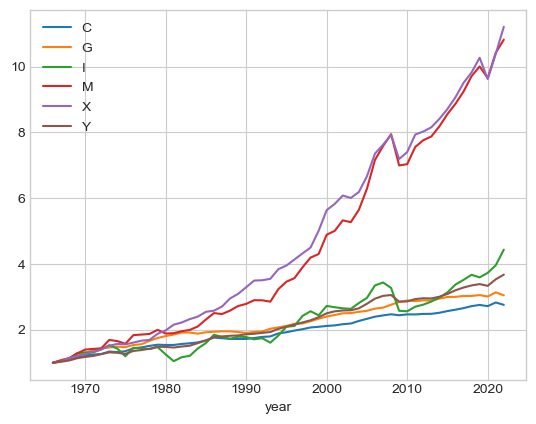

In [12]:
def first(x): # select the first element in a series - note that this assumes data is sorted by year
    return x.iloc[0]

nah1_alt = nah1_true.copy()
grouped = nah1_alt.groupby(['variable', 'unit'])
nah1_alt['indexed'] = grouped.transform(lambda x: x/first(x))['value']

# keep only values in real prices
I = nah1_alt.unit == 'real'
nah1_alt = nah1_alt[I]

# group and plot 
(nah1_alt.set_index('year')
         .groupby('variable')['indexed']
         .plot(legend=True));

**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [13]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)

# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

,municipality,price,date
0,Hele landet,4021.0,1992-01-01
1,Region Hovedstaden,5836.0,1992-01-01
2,Landsdel København by,5658.0,1992-01-01
3,København,5355.0,1992-01-01
4,Frederiksberg,5183.0,1992-01-01


## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [14]:
# a. load data
# 'new' PyDST
pop_response = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})
pop = PyDST.utils.to_dataframe(pop_response)

# or the 'old' pydst
# pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# or dstapi
# pop_class = DstApi('FOLK1A')
# params = pop_class._define_base_params(language='en')
# params['variables'] = [{'code': 'OMRÅDE', 'values': ['*']},
#                    {'code': 'KØN', 'values': ['TOT']},
#                    {'code': 'ALDER', 'values': ['IALT']},
#                    {'code': 'CIVILSTAND', 'values': ['TOT']},
#                    {'code': 'Tid', 'values': ['*']}]
# pop = pop_class.get_data(params)

# b. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# c. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# d. convert to date
pop['date'] = pd.to_datetime(pop.TID)
del pop['TID']

pop.head()

,municipality,population,date
2,Copenhagen,509861,2008-01-01
3,Frederiksberg,93444,2008-01-01
4,Dragør,13261,2008-01-01
5,Tårnby,40016,2008-01-01
6,Albertslund,27602,2008-01-01


## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

Text(0, 0.5, 'log difference in price')

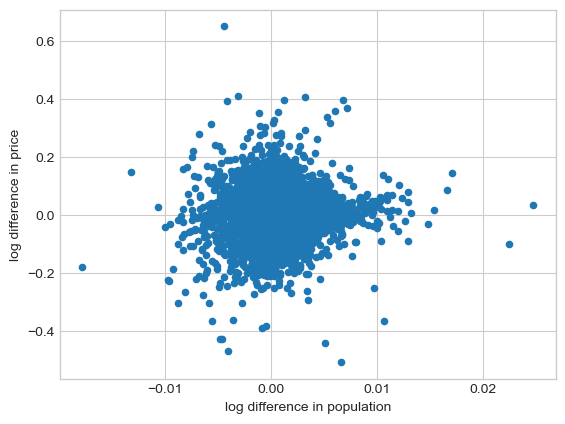

In [15]:
# a. merge
full = pd.merge(pop, prices_long, on=['date','municipality'], how='left')
full.sort_values(['municipality','date'], inplace=True)

# b. take logs
full['log_population'] =  np.log(full['population'])
full['log_price'] =  np.log(full['price'])

# c. figur 1: log differences
ax = full.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('log difference in population') 
ax.set_ylabel('log difference in price')


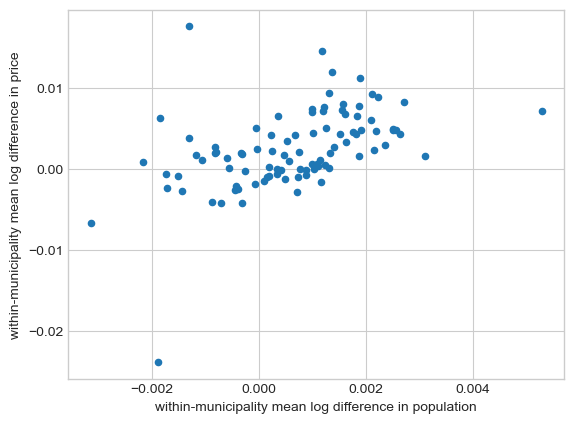

In [16]:
# c. figur 2: mean log differences
ax = full.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_price', kind = 'scatter'); 
ax.set_xlabel('within-municipality mean log difference in population')
ax.set_ylabel('within-municipality mean log difference in price'); 

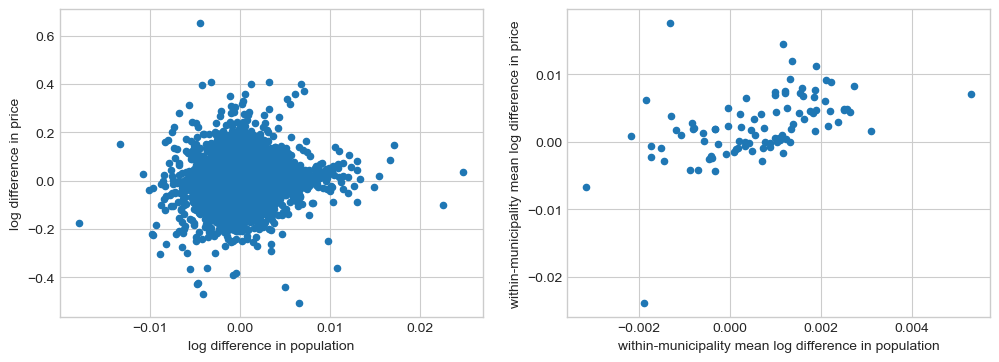

In [17]:
# Plot for slides
fig = plt.figure(figsize=(12,4))

ax0 = fig.add_subplot(1,2,1)
full.groupby('municipality').diff(1).plot(x = 'log_population', y = 'log_price', kind = 'scatter', ax=ax0)
ax0.set_xlabel('log difference in population') 
ax0.set_ylabel('log difference in price')

ax1 = fig.add_subplot(1,2,2)
full.groupby('municipality').agg(lambda x: np.mean(x.diff())).plot(x = 'log_population', y = 'log_price', kind = 'scatter',ax=ax1); 
ax1.set_xlabel('within-municipality mean log difference in population')
ax1.set_ylabel('within-municipality mean log difference in price'); 
#fig.savefig('problemset4.png')

**Answer:** See A5.py for difference within total population. See A6.py for difference within municipality